## Exploratory Data Analysis: Haberman’s Cancer Survival Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
haber = pd.read_csv('D:\Data_Practice\haberman.csv')

In [2]:
print(haber.shape)
print(haber.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


# Observations:
1. Dataset has 306 datapoints with four columns
2. Dataset contains 3 input features 'age', 'year', 'nodes' and a label column 'status'

In [4]:
d=dict(haber['status'].value_counts()) #count based on label i.e status
for k in d.keys():
    if k == 1:
        print("Number of persons survived 5 or more years after treatment:",d[k])
    else:
        print("Number of persons survived less than 5 years after treatment:",d[k])

Number of persons survived 5 or more years after treatment: 225
Number of persons survived less than 5 years after treatment: 81


# Observations:
1. Distingiushing data using label
2. Number of persons survived more than 5 years are far more than that of not survived(225>>81). 
3. Dataset is imbalanced

# Histograms:

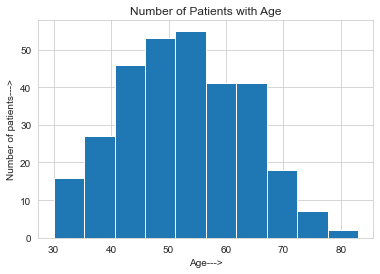

In [25]:
#matplot hist gives count for particular feature
counts, bin_edges = np.histogram(haber['age'], bins=10) 
plt.hist(haber['age'],bins=10,histtype='barstacked') #count 
plt.title('Number of Patients with Age')
plt.xlabel('Age--->')
plt.ylabel('Number of patients--->')
plt.show()

# Observations:
1. Plot with one feature --> Age 
2. We can see patients of age in range of 30 to 80
3. More number of patients are in age range 45 to 55

# 2D Plots and Data Understanding:

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64


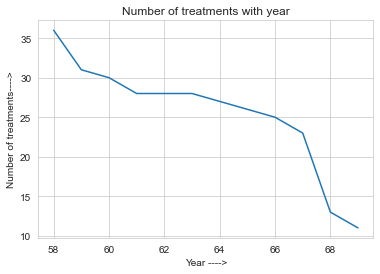

In [26]:
#how many treated in particular year from 1958 to 1969
print(haber['year'].value_counts())
plt.plot(np.unique(haber['year'].values),haber['year'].value_counts())
plt.title('Number of treatments with year')
plt.xlabel('Year ---->')
plt.ylabel('Number of treatments---->')
plt.show()

# Observations:
1. Plot is between year and number of operations per year
2. Operations saw a constant downfall from 1958 to 69

In [7]:
haber.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observations:
1. We can see basic description of data like mean, standard deviation, percentiles etc
2. There are no outliers in age data as we can see mean and median(50%) are almost same in age
3. Max number of nodes a patient having is 52 and they vary with wide range (0 to 52), mean and median has noticable difference
3. Remaining features except age and nodes makes no sense as they are categorical.

In [8]:
surv = haber[haber["status"] == 1]
nsurv = haber[haber["status"] == 2]

In [89]:
surv.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [90]:
nsurv.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Observations:
1. There is no major difference in age details for survived and not survived
2. Patients survided were having lesser number of nodes compared to patients died before 5 years after treatment.

# Univariate Analysis :

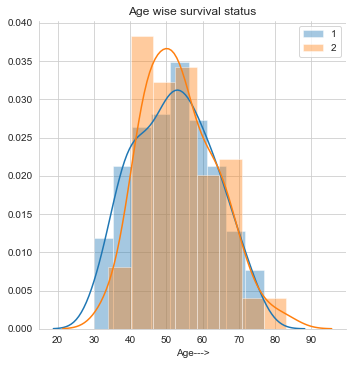

In [28]:
#Univariate Analysis - Histogram with PDF

g=sb.FacetGrid(haber,hue='status',height=5)
g=g.map(sb.distplot,'age')
plt.title('Age wise survival status')
plt.xlabel('Age--->')
plt.legend()
plt.show()

# Observations:
1. We can observe, overlapping is huge i.e survival after treatment hardly depends on age.
2. By using just age we cannot depict survival chance of a patient.
3. There are few chances for the patients to survive with age 30 to 45 and with increase in age survival chances decrease by small margin and chance of non survival increases.
4. Patients with age more than 75 are unlikely to survive.

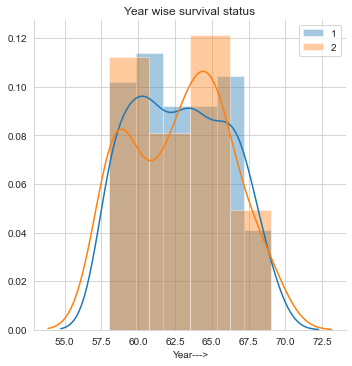

In [32]:
#Univariate Analysis - Histogram with PDF
sb.set_style
('whitegrid')
g=sb.FacetGrid(haber,hue='status',height=5)
g=g.map(sb.distplot,'year')
plt.title('Year wise survival status')
plt.xlabel('Year--->')
plt.legend()
plt.show()

# Observations:

1. Plot tells us the survival status acc to year, so it doesn't help in predicting survival status.
2. Huge overlapping is observed.
3. We can say operations happened between 1958 to 1963 and 1966 to 1968 are successful and between 63 to 65 there were more unsuccessful operations.

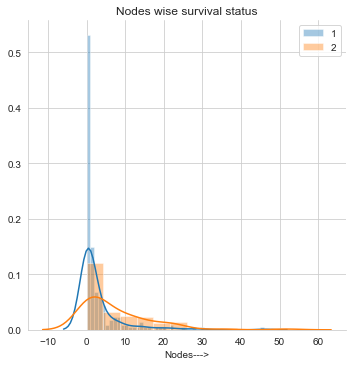

In [34]:
#Univariate Analysis - Histogram with PDF
sb.set_style
('whitegrid')
g=sb.FacetGrid(haber,hue='status',height=5)
g=g.map(sb.distplot,'nodes')
plt.title('Nodes wise survival status')
plt.xlabel('Nodes--->')
plt.legend()
plt.show()

# Observations:
1. Overlap is there but comparitively this depicts good.
2. Patients with 0, 1 nodes have high chances of surival.
3. With increase in nodes, surival chance falls abruptly.
4. Patients with nodes more than 18 to 20 have very less chances of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
***************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


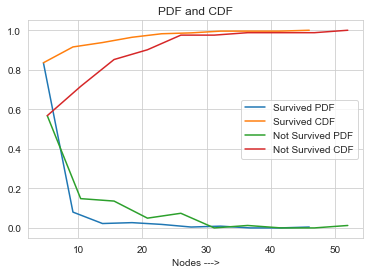

In [35]:
# PDF and CDF
counts, bin_edges = np.histogram(surv['nodes'], bins=10) #bins-->
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print("***************************************************")
counts, bin_edges = np.histogram(nsurv['nodes'], bins=10) #bins-->
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Nodes --->')
plt.legend(['Survived PDF','Survived CDF','Not Survived PDF','Not Survived CDF'])
plt.title('PDF and CDF')
plt.show()

# Observations:
1. Most of the patients(83%) survived were having 4 or less number of nodes
2. Patients who didn't survive has nodes ranging from 1 to 52.

# Bivariate Analysis:

# 2D Scatter Plot:

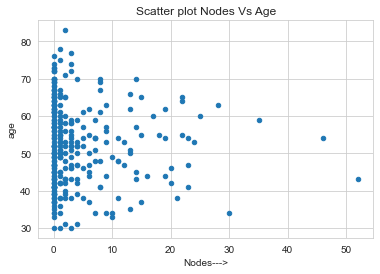

In [36]:
haber.plot(kind='scatter',x='nodes',y='age')
plt.xlabel('Nodes--->')
plt.title('Scatter plot Nodes Vs Age')
plt.show()

1. Observation cannot me made clearly.

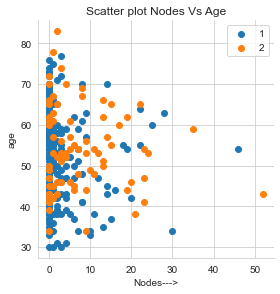

In [38]:
sb.set_style
('whitegrid')
sb.FacetGrid(haber,hue='status',height=4).map(plt.scatter,'nodes','age')
plt.title('Scatter plot Nodes Vs Age')
plt.xlabel('Nodes--->')
plt.legend()
plt.show()

# Observations:
1. We have seen, huge overlappting is there. 
2. No proper conclusion can be made.

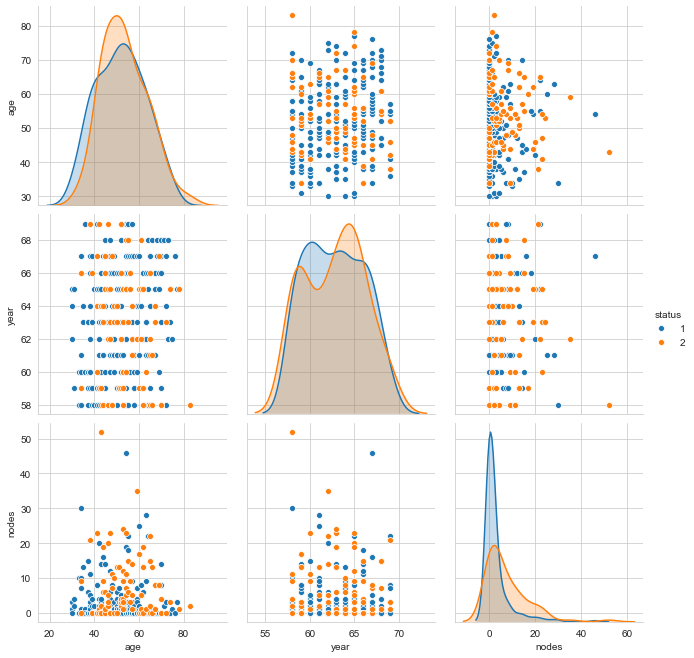

In [40]:
sb.pairplot(haber,hue='status',height=3)
plt.show()

# Observations:
1. No pairplot does good job, but plot between age and nodes is better comparitively.

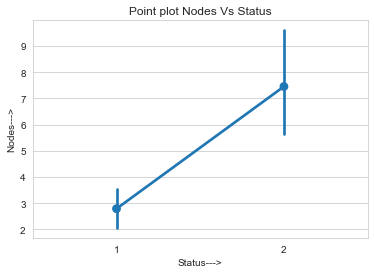

In [41]:
sb.set_style="darkgrid"
sb.pointplot(x="status", y="nodes", data=haber)
plt.title('Point plot Nodes Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Nodes--->')
plt.show()

# Observations:
1. Survival chances falls with increase in nodes.

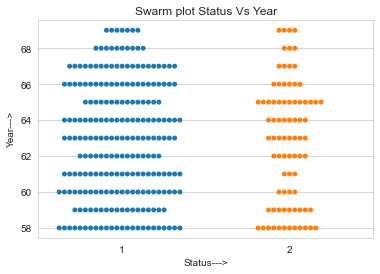

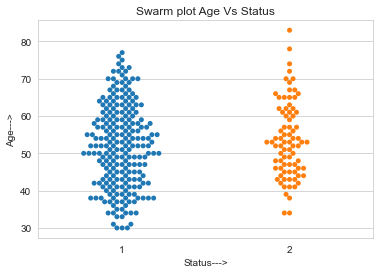

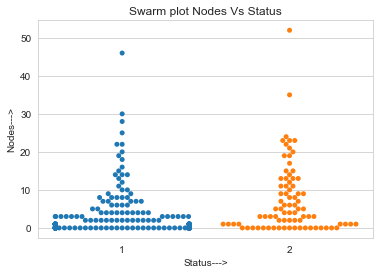

In [42]:
sb.set_style="darkgrid"
sb.swarmplot(x="status", y="year", data=haber)
plt.title('Swarm plot Status Vs Year')
plt.xlabel('Status--->')
plt.ylabel('Year--->')
plt.show()
sb.swarmplot(x="status", y="age", data=haber)
plt.title('Swarm plot Age Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Age--->')
plt.show()
sb.swarmplot(x="status", y="nodes", data=haber)
plt.title('Swarm plot Nodes Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Nodes--->')
plt.show()

# Observations:
1. Age and year has less influence on survival whereas nodes has better influence on surival status

              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0


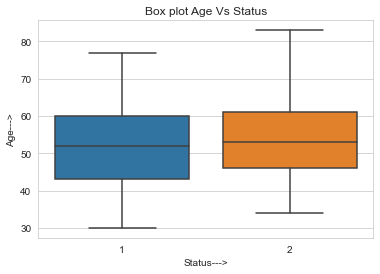

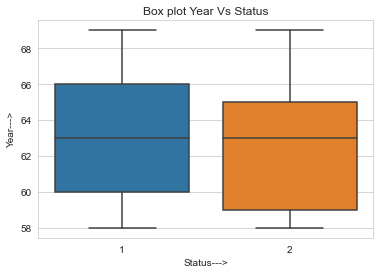

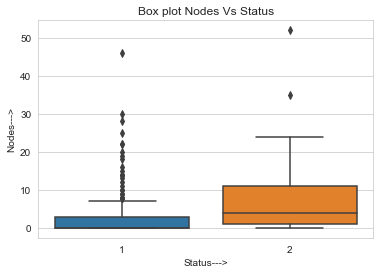

In [43]:
print(surv.describe())
sb.boxplot(x='status',y='age',data=haber)
plt.title('Box plot Age Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Age--->')
plt.show()
sb.boxplot(x='status',y='year',data=haber)
plt.title('Box plot Year Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Year--->')
plt.show()
sb.boxplot(x='status',y='nodes',data=haber)
plt.title('Box plot Nodes Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Nodes--->')
plt.show()

# Observations:
1. Age plays very less role in predicting survival status
2. Operations happened lately in 1966 are successful.
3. Patients with nodes more than 1 have less chances of surival.

              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0


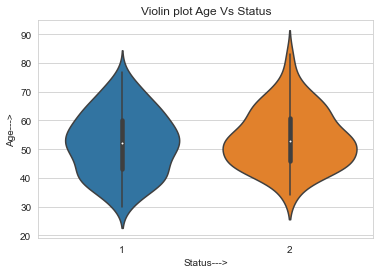

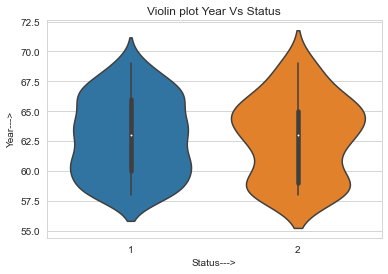

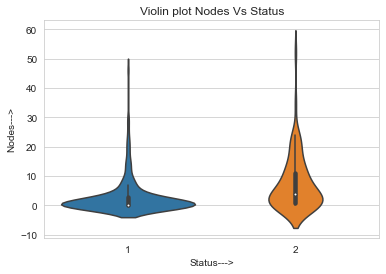

In [44]:
print(surv.describe())
sb.violinplot(x='status',y='age',data=haber)
plt.title('Violin plot Age Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Age--->')
plt.show()
sb.violinplot(x='status',y='year',data=haber)
plt.title('Violin plot Year Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Year--->')
plt.show()
sb.violinplot(x='status',y='nodes',data=haber)
plt.title('Violin plot Nodes Vs Status')
plt.xlabel('Status--->')
plt.ylabel('Nodes--->')
plt.show()

# Observations:
1. Patients in the age group 45 to 60 have less chances of survival.
2. Operations happened in 1965 are mostly unsuccessful.
3. Patients with 0,1 nodes have high chance of survival and more than 1 indicates less chance.

# Multivariate Analysis:


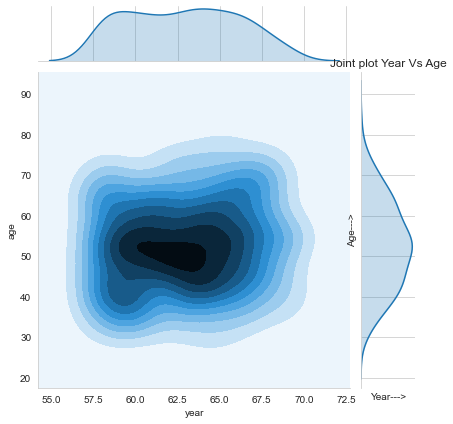

In [45]:
#Multivariate plots  - Contour plots
sb.jointplot(x = 'year',y = 'age', data = haber, kind = 'kde')
plt.title('Joint plot Year Vs Age')
plt.xlabel('Year--->')
plt.ylabel('Age--->')
plt.show()

# Observations:
1. More number of operations happened between 1960 and 66 are in age group 45 to 60.

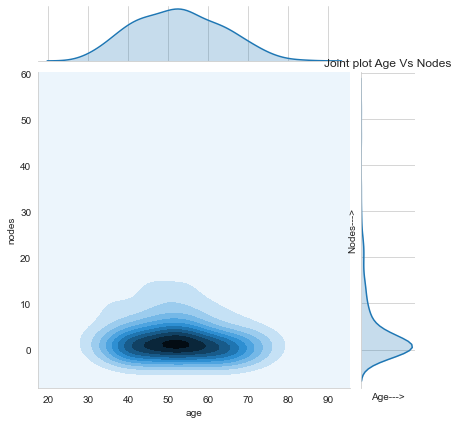

In [46]:
#Multivariate plots  - Contour plots
sb.jointplot(x = 'age',y = 'nodes', data = haber, kind = 'kde')
plt.title('Joint plot Age Vs Nodes')
plt.xlabel('Age--->')
plt.ylabel('Nodes--->')
plt.show()

# Observations:
1. Patients with 0 to 1 nodes have high survival chance mostly irrespective of their ages.

# Conclusion:



1. As we have seen , only feature that has noticable effect on survival chance is Number of nodes.
2. Year of operation and age of patient doesn' have much to do with surival chance, but patients with age less than 40 has chances compared to more age patients.
3. As the years passes number of operations decreased, but success rate has small improvement.
4. Even with number of nodes we can see there are patients who didn't survive with less number of nodes.
5. As features given are highly overlapping and data is imbalanced, predicting survival chances is highly challenging.

# References:
1. https://seaborn.pydata.org/examples/index.html
2. https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb